# 画像メディア工学４回目
## 4. 画像の読み込み，ヒストグラムの描画，トーンカーブを利用した変換
### ライブラリの読み込み（おまじない）

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

## 4.1 画像の読み込みと表示
### Google colaboratoryで利用する場合

以下のコマンドを実行すると，Colabに画像がアップされます．

時間が経つと実行環境がリセットされるため，その際には再度画像ファイルのアップロードが必要．

https://github.com/yamazoe/ImageMediaProcessing/raw/main/img/img01a.png

https://github.com/yamazoe/ImageMediaProcessing/raw/main/img/img01b.png

img01a | img01b
:---: | :---:
<img src="https://raw.githubusercontent.com/yamazoe/ImageMediaProcessing/main/img/img01a.png" width="200px">|<img src="https://raw.githubusercontent.com/yamazoe/ImageMediaProcessing/main/img/img01b.png" width="200px">

In [2]:
!wget https://raw.githubusercontent.com/yamazoe/ImageMediaProcessing/main/img/img01a.png -O img01a.png
!wget https://raw.githubusercontent.com/yamazoe/ImageMediaProcessing/main/img/img01b.png -O img01b.png

--2025-10-31 22:12:20--  https://raw.githubusercontent.com/yamazoe/ImageMediaProcessing/main/img/img01a.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 67556 (66K) [image/png]
Saving to: ‘img01a.png’

img01a.png          100%[===================>]  65.97K  --.-KB/s    in 0.03s   

2025-10-31 22:12:20 (2.31 MB/s) - ‘img01a.png’ saved [67556/67556]

--2025-10-31 22:12:20--  https://raw.githubusercontent.com/yamazoe/ImageMediaProcessing/main/img/img01b.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 62783 (61K) [image/png]
Sa

### 画像の読み込み
ここでは，画像の読み込みには，OpenCVの関数``cv2.imread()``を利用する．

In [3]:
imga = cv2.imread('img01a.png', 0)  # モノクロ画像として読み込み
imgb = cv2.imread('img01b.png', 0)  # モノクロ画像として読み込み

画像の表示には，matplotlibの関数``plt.imshow()``を利用する．

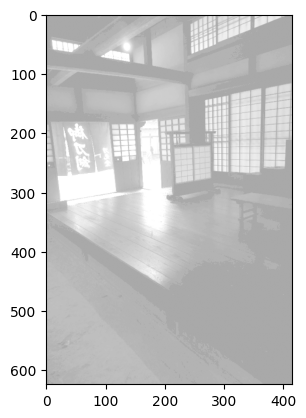

In [4]:

plt.imshow(imga, cmap='gray', vmin = 0, vmax = 255)

モノクロ画像として読み込んでいるので，画像（配列）のサイズは２次元．

numpyの配列には，``shape``というインスタンス変数があり，``.shape``とすることで，配列の形状を確認できる．

In [5]:
imga.shape

(624, 416)

OpenCVでカラー画像を読み込んだ場合には，色変換が必要（３次元配列のRGBの順番が異なるため）．

ただし，この例では元画像がグレーなので，カラーでは表示されません．

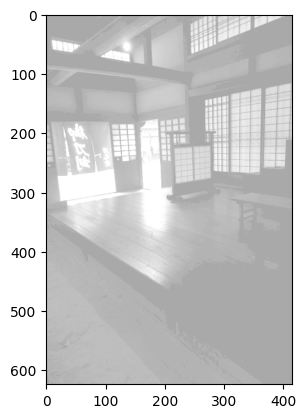

In [6]:
img_col = cv2.imread('img01a.png')  # カラー画像として読み込み
img_col = cv2.cvtColor(img_col, cv2.COLOR_BGR2RGB)
plt.imshow(img_col, vmin = 0, vmax = 255)

## 4.2 画像統計量の計算

最小値，最大値などの画像統計量は，以下のように計算できる．

```imga```の場合

In [7]:
minval = np.min(imga)      # 最小値
maxval = np.max(imga)      # 最大値
ave    = np.average(imga)  # 平均値
median = np.median(imga)   # 中央値
sd     = np.std(imga)      # 標準偏差

print( minval, maxval )   # 最小値, 最大値
print( ave, median, sd )  # 平均値, 中央値, 標準偏差

169 255
189.9418685281065 182.0 24.051828719008537


```imgb```の場合

In [8]:
minval = np.min(imgb)      # 最小値
maxval = np.max(imgb)      # 最大値
ave    = np.average(imgb)  # 平均値
median = np.median(imgb)   # 中央値
sd     = np.std(imgb)      # 標準偏差

print( minval, maxval )   # 最小値, 最大値
print( ave, median, sd )  # 平均値, 中央値, 標準偏差

34 78
44.90677391518738 41.0 12.201015669990717


## 4.3 ヒストグラムの描画
``plt.hist()``関数を用いてヒストグラムを描画できる．
ここでは，ビンの数: 25, 範囲: 0-255と設定している．

画像は２次元または３次元配列であるが，ヒストグラムを描画する際には１次元配列に変換する必要がある．

``.ravel()``を用いることで，多次元配列を1次元配列に変換できる．

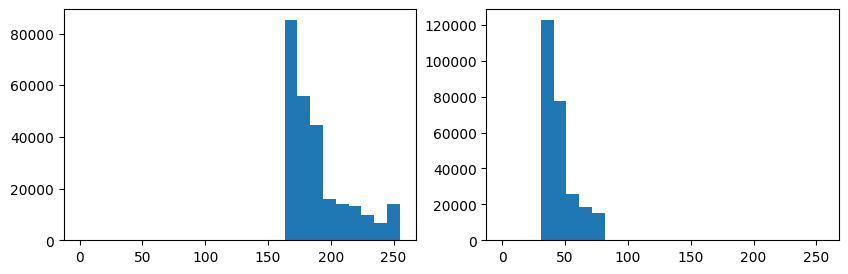

In [9]:
plt.figure(figsize=(10,3))
plt.subplot(121)
plt.hist(imga.ravel(), bins=25, range=(0, 255));
plt.subplot(122)
plt.hist(imgb.ravel(), bins=25, range=(0, 255));

#  課題（提出必須）
画像(``img01a.png``）に対して，折れ線型トーンカーブを用いてコントラストを上げたい．プログラム中で定義される下図の３種類の折れ線型トーンカーブ```tcurve1, tcurve2, tcurve3```のうち、適切なものを回答してください．

プログラム中の，以下の行のうちの１行のコメントを外すと、
それぞれのトーンカーブの形状と処理結果が表示されます．

```
tonecurve = tcurve1
#tonecurve = tcurve2
#tonecurve = tcurve3
```

<img src="https://github.com/yamazoe/ImageMediaProcessing/blob/main/img/week04-tcurve.png?raw=true" width="600">


###課題確認用プログラム

# 新しいセクション

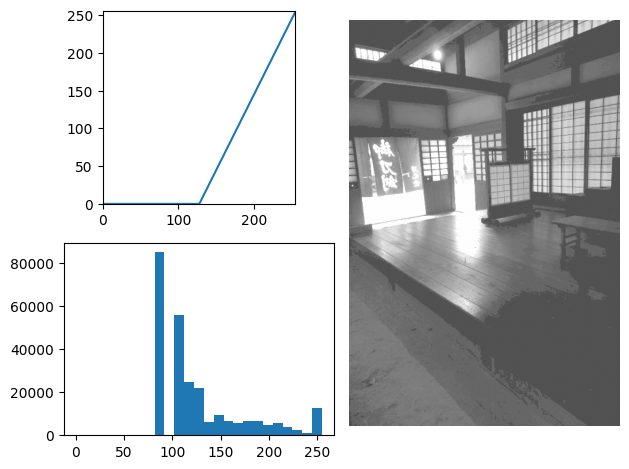

In [15]:
img1 = cv2.imread('img01a.png', 0)  # モノクロ画像として読み込み

# トーンカーブの定義
#（わかりやすさ優先で書いているため，実際のプログラムではこういった書き方は推奨されません）
tcurve1 = np.zeros(256)
tcurve2 = np.zeros(256)
tcurve3 = np.zeros(256)

# トーンカーブ１
for i in range(256):
  tcurve1[i]= 0.8*(i)

# トーンカーブ２
for i in range(128,256):
  tcurve2[i]= 2*(i-128)

# トーンカーブ３
for i in range(0,128):
  tcurve3[i]= 2*(i)
for i in range(128,256):
  tcurve3[i]= 255


# 使用するトーンカーブの選択
tonecurve = tcurve1
tonecurve = tcurve2
#tonecurve = tcurve3

# トーンカーブの適用
img2 = cv2.LUT(img1, tonecurve)

# トーンカーブの描画
plt.subplot(2,2,1)
plt.plot(tonecurve)
plt.gca().set_aspect('equal', adjustable='box')  # グラフを正方形に
plt.xlim((0,255))
plt.ylim((0,255))

# 返還後のヒストグラムの描画
plt.subplot(2,2,3)
plt.hist(img2.ravel(), bins=25, range=(0, 255));

# 変換結果の描画
plt.subplot(1,2,2)
plt.imshow(img2, cmap='gray', vmin = 0, vmax = 255)
plt.axis('off')  # 画像には軸を表示しない

plt.tight_layout()
plt.show()

# Python課題 （オプション）

 上のトーンカーブによる変換において，「3.2 画像統計量の計算」で計算した変数``minval, maxval, ave, median, sd``を利用することで，コントラストを最大とする折れ線型トーンカーブを作成できます．そのようなトーンカーブ``tcurve4``を作成するにはどうすればよいでしょうか．